# Distance Threshold Optimization

This notebook aims to optimize the distance threshold of the clipping step. Vertices are clipped when they are `dist_threshold` away from a given vertex. This notebook is very similar to the euclidian error optimization one.

In [5]:
from test import accuracy

import numpy as np
import csv
import matplotlib.pyplot as plt

In [6]:
def accuracy_vs_dist_threshold():
    threshold_values = []
    abs_accuracy_values = []
    rel_accuracy_values = []

    with open("../data/test/areas.csv", "r") as f:
        ground_truths = list(csv.DictReader(f))

    for threshold in np.linspace(0, 100, 30, endpoint=True):
        print(f"Processing threshold = {threshold} nm")
        threshold_values.append(threshold)
        alg_output = accuracy.algorithm_output(0.67, threshold)
        alg_output_sum, ground_truth_sum, abs_diff, sum_time, table_rows = accuracy.summary_stats(alg_output, ground_truths, "amira")
        abs_accuracy_values.append(abs_diff)
        rel_accuracy_values.append(alg_output_sum - ground_truth_sum)

    return threshold_values, abs_accuracy_values, rel_accuracy_values

In [7]:
threshold_values, abs_accuracy, rel_accuracy = accuracy_vs_dist_threshold()

Processing threshold = 0.0 nm
Processing threshold = 3.4482758620689653 nm
Processing threshold = 6.896551724137931 nm
Processing threshold = 10.344827586206897 nm
Processing threshold = 13.793103448275861 nm
Processing threshold = 17.241379310344826 nm
Processing threshold = 20.689655172413794 nm
Processing threshold = 24.137931034482758 nm
Processing threshold = 27.586206896551722 nm
Processing threshold = 31.034482758620687 nm
Processing threshold = 34.48275862068965 nm
Processing threshold = 37.93103448275862 nm
Processing threshold = 41.37931034482759 nm
Processing threshold = 44.82758620689655 nm
Processing threshold = 48.275862068965516 nm
Processing threshold = 51.72413793103448 nm
Processing threshold = 55.172413793103445 nm
Processing threshold = 58.62068965517241 nm
Processing threshold = 62.068965517241374 nm
Processing threshold = 65.51724137931033 nm
Processing threshold = 68.9655172413793 nm
Processing threshold = 72.41379310344827 nm
Processing threshold = 75.8620689655

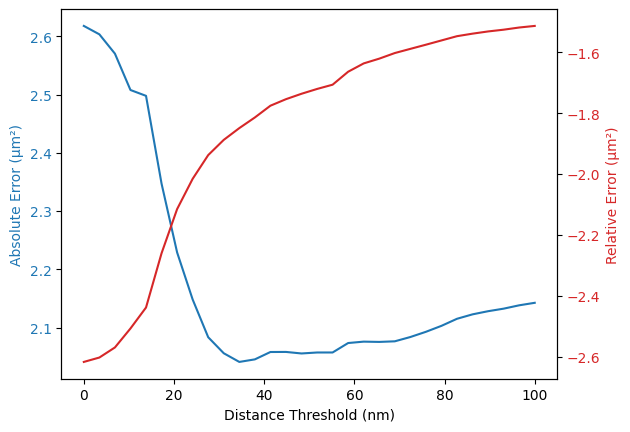

In [9]:
# Plot absolute and relative error as a function of the distance threshold
fig, ax1 = plt.subplots()

ax1.set_xlabel("Distance Threshold (nm)")
ax1.set_ylabel("Absolute Error (μm²)", color="tab:blue")
ax1.plot(threshold_values, abs_accuracy, color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")

ax2 = ax1.twinx()
ax2.set_ylabel("Relative Error (μm²)", color="tab:red")
ax2.plot(threshold_values, rel_accuracy, color="tab:red")
ax2.tick_params(axis="y", labelcolor="tab:red")